# 딥러닝 복습

In [ ]:
import pandas as pd
import tensorflow as tf

# 데이터를 준비합니다.
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
df = pd.read_csv(path)

x_train = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
              'rad', 'tax','ptratio', 'b', 'lstat']]
y_train = df[['medv']]
print(x_train.shape, y_train.shape)

# 모델을 준비합니다.
X = tf.keras.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation="relu")(X)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y)
model.compile(loss='mse')

# 모델을 학습합니다.
model.fit(x_train, y_train, epochs=10)

In [ ]:
import tensorflow as tf

# 데이터를 준비합니다.
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train)
print(x_train.shape, y_train.shape)

# 모델을 만듭니다.
X = tf.keras.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(32, 3, padding="same")(X)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation="relu")(H)
H = tf.keras.layers.Dense(84, activation="relu")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="categorical_crossentropy",
              metrics="accuracy")

# 모델을 학습합니다.
model.fit(x_train, y_train, epochs=10)

# FinanceDataReader
- https://github.com/financedata-org/FinanceDataReader

In [ ]:
!pip install finance-datareader
# bokeh 버전 조정.
!pip uninstall bokeh -y
!pip install bokeh==2.4.3

In [ ]:
import bokeh
print(bokeh.__version__)

In [ ]:
import FinanceDataReader as fdr

# KT 주식
df = fdr.DataReader('030200', '2023-08-01')

# 캔들차트 그리기
fdr.chart.plot(df, title='KT(030200)')

# KT 주가 예측 모델

In [ ]:
import FinanceDataReader as fdr
import numpy as np

# KT(030200) 전체 (1999-05-31 ~ 현재)
df = fdr.DataReader('030200')
data = df.values[:, :-1]
print(data.shape)

# train, val, test 분리
train, val, test = data[:-900], data[-900:-600], data[-600:]
print(train.shape, val.shape, test.shape)

# normailze - 표준화
norm = {'std': train.std(axis=0), 'mean': train.mean(axis=0)}
train = (train - norm['std']) / norm['mean']
val = (val - norm['std']) / norm['mean']
test = (test - norm['std']) / norm['mean']

In [ ]:
# 독립/종속 분리
x_train = np.array([train[i:i+10] for i in range(len(train) - 10)])
y_train = np.array([train[i+10, 3] for i in range(len(train) - 10)])
print(x_train.shape, y_train.shape)

x_val = np.array([val[i:i+10] for i in range(len(val) - 10)])
y_val = np.array([val[i+10, 3] for i in range(len(val) - 10)])
print(x_val.shape, y_val.shape)

x_test = np.array([test[i:i+10] for i in range(len(test) - 10)])
y_test = np.array([test[i+10, 3] for i in range(len(test) - 10)])
print(x_test.shape, y_test.shape)

In [ ]:
import tensorflow as tf

# vanilla RNN
X = tf.keras.layers.Input(shape=(10, 5))
H = tf.keras.layers.SimpleRNN(8)(X)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='mse', optimizer='adam')
model.summary()

In [ ]:
# 학습
model.fit(x_train, y_train, epochs=100,
          batch_size=128, validation_data=(x_val, y_val))

# 평가
model.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.figure(figsize=(10, 5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['pred', 'real'])
plt.show()


# MNIST 이미지 분류

In [ ]:
import tensorflow as tf

# MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
# (60000, 28, 28) (60000,)

## with SimpleRNN

In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.SimpleRNN(32)(X)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy",
              metrics="accuracy")
model.summary()

In [ ]:
# 학습
model.fit(x_train, y_train, epochs=10,
          batch_size=128, validation_split=0.2)

# 평가
model.evaluate(x_test, y_test)

## with LSTM

In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.LSTM(32)(X)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy",
              metrics="accuracy")
model.summary()

In [ ]:
# 학습
model.fit(x_train, y_train, epochs=10,
          batch_size=128, validation_split=0.2)

# 평가
model.evaluate(x_test, y_test)

# 텍스트 분류

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = tf.keras.utils.pad_sequences(x_train, maxlen=20)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000,) (25000,)
(25000, 20) (25000,)
(25000, 20) (25000,)


## 리뷰 글 출력

In [2]:
word2index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i, w) for w, i in word2index.items())
print(sorted(list(index2word.items()))[:10])

1641221/1641221 [==============================] - 0s 0us/step
[(1, 'the'), (2, 'and'), (3, 'a'), (4, 'of'), (5, 'to'), (6, 'is'), (7, 'br'), (8, 'in'), (9, 'it'), (10, 'i')]


In [3]:
decoded = " ".join(index2word[i] for i in x_train[1])
print(x_train[1][:10])
print(decoded[:50])

[  23    4 1690   15   16    4 1355    5   28    6]
are of ship for with of wild to one is very work d


## with SimpleRNN + Embedding

In [ ]:
import tensorflow as tf

X = tf.keras.Input(shape=[20])
H = tf.keras.layers.Embedding(88585, 28)(X)
H = tf.keras.layers.SimpleRNN(32)(H)
Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="binary_crossentropy", metrics="accuracy")

model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

## with Hidden Sequences

In [ ]:
import tensorflow as tf

X = tf.keras.Input(shape=[20])

H = tf.keras.layers.Embedding(88585, 28)(X)
H = tf.keras.layers.SimpleRNN(32, return_sequences=True)(H)
H = tf.keras.layers.GlobalAveragePooling1D()(H)
Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="binary_crossentropy", metrics="accuracy")

model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

## with Transformer

In [ ]:
import tensorflow as tf

X = tf.keras.Input(shape=[20])

H = tf.keras.layers.Embedding(88585, 28)(X)
H = tf.keras.layers.SimpleRNN(32, return_sequences=True)(H)

# Transformer::self-attentions
H1 = tf.keras.layers.MultiHeadAttention(2, 16)(H, H)
H = tf.keras.layers.BatchNormalization()(H + H1)

# Transformer::feed-forward
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H = tf.keras.layers.BatchNormalization()(H + H1)

H = tf.keras.layers.GlobalAveragePooling1D()(H)
Y = tf.keras.layers.Dense(1, activation="sigmoid")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="binary_crossentropy", metrics="accuracy")

model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# 데이터 전처리

In [1]:
# NLTK의 데이터 다운로드 (한 번만 수행하면 됨)
#nltk.download('stopwords')
#nltk.download('wordnet')

# 샘플 텍스트 데이터
text1 = """Natural language processing (NLP) is a field
of computer science, artificial intelligence,
and computational linguistics concerned with
the interactions between computers and human
(natural) languages."""

text2 = """자연어 처리(Natural Language Processing, NLP)는
인간의 언어 현상을 컴퓨터와 같은 기계를 이용하여
모사할 수 있도록 하는 인공 지능의 하위 분야 중 하나입니다."""


## 한글 세팅

In [4]:
!pip install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 20.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to

In [2]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf   NanumGothicCoding.ttf  NanumSquareB.ttf
NanumBarunGothic.ttf	   NanumGothic.ttf	  NanumSquareRoundB.ttf
NanumGothicBold.ttf	   NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumGothicCodingBold.ttf  NanumMyeongjo.ttf	  NanumSquareR.ttf


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 토큰화

In [4]:
import nltk

# 말뭉치 다운로드
nltk.download('punkt')

# 텍스트 토큰화 (Tokenization)
tokens1 = nltk.tokenize.word_tokenize(text1)
print(tokens1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', ',', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', '.']


In [14]:
from konlpy.tag import Okt

# KoNLPy에서 Okt 형태소 분석기를 사용
okt = Okt()

# 텍스트 토큰화 (Tokenization)
tokens2 = okt.morphs(text2, stem = True)
print(tokens2)

['자연어', '처리', '(', 'Natural', 'Language', 'Processing', ',', 'NLP', ')', '늘다', '\n', '인간', '의', '언어', '현상', '을', '컴퓨터', '와', '같다', '기계', '를', '이용', '하다', '\n', '모사', '하다', '수', '있다', '하다', '인공', '지능', '의', '하위', '분야', '중', '하나', '이다', '.']


## 정제 & 정규화

In [15]:
# 정제 (Cleaning) 및 정규화 (Normalization)

cleaned_tokens1 = [token.lower() for token in tokens1 if token.isalnum()]
print(cleaned_tokens1)

cleaned_tokens2 = [token for token in tokens2 if token.isalnum()]
print(cleaned_tokens2)

['natural', 'language', 'processing', 'nlp', 'is', 'a', 'field', 'of', 'computer', 'science', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages']
['자연어', '처리', 'Natural', 'Language', 'Processing', 'NLP', '늘다', '인간', '의', '언어', '현상', '을', '컴퓨터', '와', '같다', '기계', '를', '이용', '하다', '모사', '하다', '수', '있다', '하다', '인공', '지능', '의', '하위', '분야', '중', '하나', '이다']


In [7]:
# 어간 추출 (Stemming)
stemmer1 = nltk.stem.PorterStemmer()
stemmed_tokens1 = [stemmer1.stem(token) for token in cleaned_tokens1]
print(stemmed_tokens1)

# 표제어 추출 (Lemmatization)
nltk.download('wordnet')
lemmatizer1 = nltk.stem.WordNetLemmatizer()
lemmatized_tokens1 = [lemmatizer1.lemmatize(token) for token in cleaned_tokens1]
print(lemmatizer1)

['natur', 'languag', 'process', 'nlp', 'is', 'a', 'field', 'of', 'comput', 'scienc', 'artifici', 'intellig', 'and', 'comput', 'linguist', 'concern', 'with', 'the', 'interact', 'between', 'comput', 'and', 'human', 'natur', 'languag']


[nltk_data] Downloading package wordnet to /root/nltk_data...


<WordNetLemmatizer>


## 불용어 제거

In [16]:
# 불용어 (Stopword) 제거

nltk.download('stopwords')
stop_words1 = set(nltk.corpus.stopwords.words('english'))
filtered_tokens1 = [token for token in lemmatized_tokens1 if token not in stop_words1]
print(filtered_tokens1)

stop_words2 = set(["은", "는", "이", "가", "을", "를"])
filtered_tokens2 = [token for token in cleaned_tokens2 if token not in stop_words2]
print(filtered_tokens2)

['natural', 'language', 'processing', 'nlp', 'field', 'computer', 'science', 'artificial', 'intelligence', 'computational', 'linguistics', 'concerned', 'interaction', 'computer', 'human', 'natural', 'language']
['자연어', '처리', 'Natural', 'Language', 'Processing', 'NLP', '늘다', '인간', '의', '언어', '현상', '컴퓨터', '와', '같다', '기계', '이용', '하다', '모사', '하다', '수', '있다', '하다', '인공', '지능', '의', '하위', '분야', '중', '하나', '이다']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## WordCloud

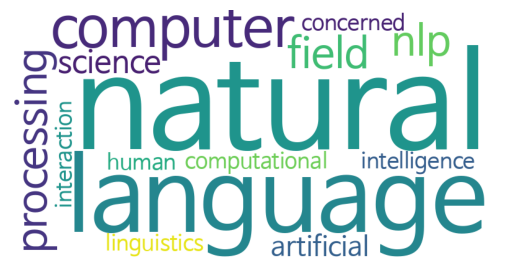

In [9]:
from wordcloud import WordCloud

# 워드클라우드 생성
wordcloud1 = WordCloud(width=800, height=400, background_color='white')
# 폰트 변경
wordcloud1.font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud1.generate(' '.join(filtered_tokens1))
wordcloud1.to_file("wordcloud1.png")

# 워드클라우드 출력
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()

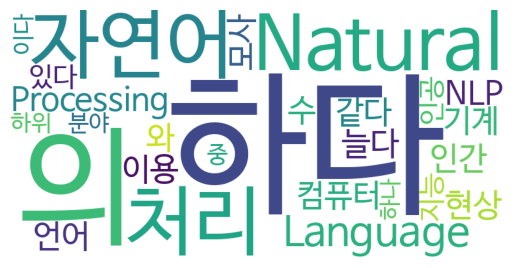

In [17]:
# 워드클라우드 생성
wordcloud2 = WordCloud(width=800, height=400, background_color='white')
# 폰트 변경
wordcloud2.font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud2.generate(' '.join(filtered_tokens2))
wordcloud2.to_file("wordcloud1.png")

# 워드클라우드 출력
plt.axis('off')
plt.imshow(wordcloud2)
plt.show()

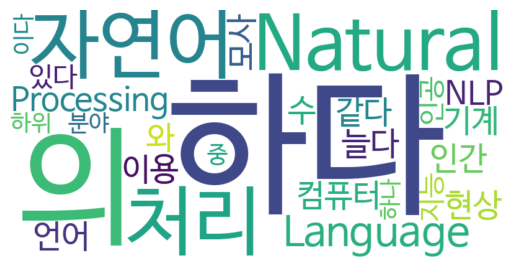

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 출력
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()
